Installing different packages that are not by default on Google collab

In [ ]:
!pip install netcdf4
!pip install pyDrive
!pip install Cartopy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import zipfile
import cartopy.crs as ccrs

# Importing the authorization packages to access data in google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#logging in the google drive system
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1LgItdn41RatSny-6JZMeAjIFWs4aO5pU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Merged.zip') 

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# !ls /content/gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
'My Drive'


##  <font color= black> Loading the wind files

In [ ]:
#The wind files the ones sent from Vento Maritime, they are hourly wind speed
# and direction at the geographic position of Anhold, Hornsrev and Redsand.
 

In [ ]:
downloaded = drive.CreateFile({'id':"1y2AmsszC7CIjCY-Sh5819q6ngZ7Vgu0_"})   # replace the id with id of file you want to access
downloaded.GetContentFile('havmolleparker.zip') 

zf = zipfile.ZipFile('havmolleparker.zip')

anhold_winddir =pd.read_csv(zf.open('anholt_winddir_1999_2019_commasep.txt'))

# Anhold wind direction
anhold_winddir=anhold_winddir.set_index('Time')

# anhold_winddir.Time[j]=str(anhold_winddir.Time[j])[:4]+'-'+str(anhold_winddir.Time[j])[4:6]+'-'+str(anhold_winddir.Time[j])[6:8]
# anhold_winddir.Time=datetime.fromtimestamp(int(anhold_winddir.Time))
#  anhold_winddir.index= datetime.fromtimestamp(anhold_winddir.index)

# Anhold wind speed
anhold_windspd = pd.read_csv(zf.open('anholt_windspeed_1999_2019_commasep.txt'))
# anhold_windspd.Time=datetime.fromtimestamp(anhold_windspd.Time).astype(datetime64)#,format= '%Y-%m-%d')

# Hornsrev wind direction
hornsrev_winddir = pd.read_csv(zf.open('hornsrev_winddir_1999_2019_commasep.txt'))
# hornsrev_winddir.Time=datetime.fromtimestamp(hornsrev_winddir.Time)#,format= '%Y-%m-%d')

# Hornsrev wind speed
hornsrev_windspd = pd.read_csv(zf.open('hornsrev_windspeed_1999_2019_commasep.txt'))
# hornsrev_windspd.Time=datetime.fromtimestamp(hornsrev_windspd.Time)#,format= '%Y-%m-%d')


#Redsand wind direction
redsand_winddir = pd.read_csv(zf.open('redsand_winddir_1999_2019_commasep.txt'))
# redsand_winddir.Time=datetime.fromtimestamp(redsand_winddir.Time)#,format= '%Y-%m-%d')

#Redsand wind speed
redsand_windspd = pd.read_csv(zf.open('redsand_windspeed_1999_2019_commasep.txt'))
# redsand_windspd.Time=datetime.fromtimestamp(redsand_windspd.Time)#,format= '%Y-%m-%d')

In [ ]:

downloaded = drive.CreateFile({'id':"1LgItdn41RatSny-6JZMeAjIFWs4aO5pU"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Merged.zip') 

zf = zipfile.ZipFile('Merged.zip')
y = xr.open_dataset('Merged.zip') # 20170303_Kite project/18_Raw Data Set From Experiments and Internet/data/CMEMS_BAL_PHY_reanalysis_dailymeans_20170101.nc")
#y = xr.open_dataarray("/content/drive/20170303_Kite project/18_Raw Data Set From Experiments and Internet/data/CMEMS_BAL_PHY_reanalysis_dailymeans_20170101.nc")
#for i in y.variables:
#    print(i)
# y.keys()

OSError: ignored

In [ ]:
y.vo.sel(time=1, depth=0, method="nearest").plot(robust= True)

AttributeError: ignored

In [ ]:
U=y.uo
V=y.vo
current= np.sqrt(U**2 + V**2)
current.sel(time=1, depth=0, method="nearest").plot(robust= True)

In [ ]:
w = xr.open_dataset("/content/drive/20170303_Kite project/18_Raw Data Set From Experiments and Internet/data/CERSAT-GLO-BLENDED_WIND_L4-V6-OBS_FULL_TIME_SERIE_1584948716521.nc")
print(w.data_vars.keys())
print('\n\n')
print(w.coords.keys())

In [ ]:
w.wind_speed.sel(time=1, method="nearest").plot(robust= True)

##  <font color= black> Electricity price


In [ ]:
downloaded = drive.CreateFile({'id':"1LLuLVz0DCeWPi1hOHTkCMZAmGktp8kSV"})   # replace the id with id of file you want to access
downloaded.GetContentFile('elspotprices-8f52df2e75f7418eb0642c0230ef70b5.xls') 

elspot=pd.read_excel('elspotprices-8f52df2e75f7418eb0642c0230ef70b5.xls',index_col=1)

In [ ]:
elspot=elspot[(elspot['PriceArea']=='DK1') | (elspot['PriceArea']=='DK2')]
elspot=elspot.drop((['HourUTC','SpotPriceEUR']), axis=1)
elspot.index=pd.to_datetime(elspot.index,format= '%Y-%m-%d %H:%M')


elspotDK1=elspot[(elspot['PriceArea']=='DK1')]
elspotDK1=elspotDK1.drop("PriceArea", axis=1)
elspotDK1=elspotDK1.fillna(0)
elspotDK1.index=pd.to_datetime(elspotDK1.index,format= '%Y-%m-%d %H:%M')

elspotDK2=elspot[(elspot['PriceArea']=='DK2')]
elspotDK2=elspotDK2.drop("PriceArea", axis=1)
elspotDK2=elspotDK2.fillna(0)
elspotDK2.index=pd.to_datetime(elspotDK2.index,format= '%Y-%m-%d %H:%M')
elspot_avgDK=(elspotDK1+elspotDK2)/2
elspot_avgDK.index=pd.to_datetime(elspot_avgDK.index, format= '%Y-%m-%d %H:%M')

In [ ]:
elspot_avgDK

,SpotPriceDKK
HourDK,
2020-03-23 23:00:00,0.000
2020-03-23 22:00:00,0.000
2020-03-23 21:00:00,0.000
2020-03-23 20:00:00,0.000
2020-03-23 19:00:00,0.000
...,...
2019-03-03 16:00:00,225.180
2019-03-03 15:00:00,165.750
2019-03-03 14:00:00,156.200


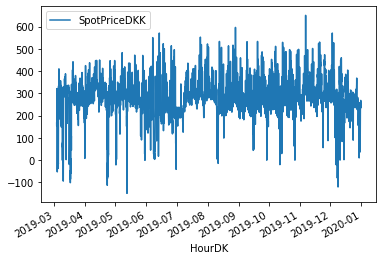

In [ ]:
elspot_avgDK.loc['2020-01-01 00:00:00':'2019-01-01 00:00:00'].plot()

##  <font color= black> Wind Energy



In [ ]:
downloaded = drive.CreateFile({'id':"1-wLdml55ElQ3Ni2NBLyiwpsHdbqIn9mh"})   # replace the id with id of file you want to access
downloaded.GetContentFile('wind-power-dk_2019_hourly.xls') 
windpowertest=pd.read_excel('wind-power-dk_2019_hourly.xls',skiprows=2)#,index_col=1))
windpowertest.rename(columns={'Unnamed: 0': 'Date'}, inplace= True)
windpowertest['time']=windpowertest['Date']+str(' ')+ windpowertest['Hours']

for j in range(len(windpowertest.index)):
    windpowertest.time[j]=windpowertest.time[j][:-5]
windpowertest=windpowertest.set_index('time')
windpowertest.index= pd.to_datetime(windpowertest.index,format= '%d-%m-%Y %H')
# windpowertest

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


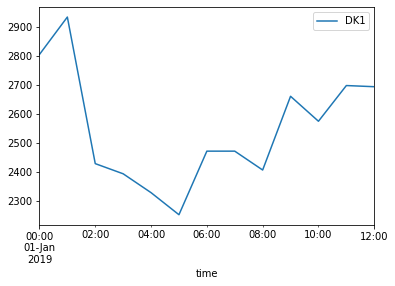

In [ ]:
windpowertest.loc['01-01-2019 00:00:00':'01-01-2019 12:00:00'].plot(y= 'DK1')